In [157]:
import pandas as pd
import numpy as np
import pandas_ta as ta
import talib
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import math as m

print("Imported necessary libraries")

Imported necessary libraries


## Data for FY2022-2023

In [158]:
start_date = dt.date(2022,4,1)
end_date = dt.date(2023,4, 1)
start_date, end_date

(datetime.date(2022, 4, 1), datetime.date(2023, 4, 1))

In [159]:
# Get data from yfinance

# Nifty daily

# df = yf.download(tickers="^NSEI", interval="1d", start=start_date, end=end_date)
# df.to_csv("nifty_daily_fy_22-23.csv")

# Indiavix daily - NOT working
# df = yf.download(tickers="^INDIAVIX", interval="1d", start=start_date, end=end_date)
# df.to_csv("indiavix_daily_fy_22-23.csv")

# Got Indiavix data from investing.com
# dfv = pd.read_html("file:///home/ganesh/Downloads/vix.html")[0]
# dfv.to_csv("indiavix_daily_fy_22-23.csv")

In [160]:
# Get nifty data stored in a local file
nifty = pd.read_excel("/home/ganesh/Github/markets/quant trading/volatility/nifty_daily_fy_22_23.xlsx")
nifty.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
244,2023-03-24,17076.199219,17109.449219,16917.349609,16945.050781,16945.050781,228000
245,2023-03-27,16984.300781,17091.000000,16918.550781,16985.699219,16985.699219,218400
246,2023-03-28,17031.750000,17061.750000,16913.750000,16951.699219,16951.699219,238800
247,2023-03-29,16977.300781,17126.150391,16940.599609,17080.699219,17080.699219,345900
248,2023-03-31,17210.349609,17381.599609,17204.650391,17359.750000,17359.750000,263900


In [161]:
# Get indiavix data stored in a local file
vix = pd.read_excel("/home/ganesh/Github/markets/quant trading/volatility/indiavix_daily_fy_22_23.xlsx")
vix["Date"] = pd.to_datetime(vix["Date"], format="%b %d, %Y")
vix.sort_values(by="Date", inplace=True)
vix = vix.iloc[1:, :]
vix

,Date,Price,Open,High,Low,Volume,Chg%
1,2022-04-04,17.9075,18.4350,18.8250,17.5925,0,-2.86%
2,2022-04-05,18.4875,17.9075,18.6300,16.7900,0,3.24%
3,2022-04-06,19.0225,18.4875,19.2825,16.8100,0,2.89%
4,2022-04-07,18.9975,19.0225,19.4900,17.7175,0,-0.13%
5,2022-04-08,17.6875,18.9975,20.0875,17.5300,0,-6.90%
...,...,...,...,...,...,...,...
244,2023-03-24,15.2400,14.4900,15.4300,14.2025,0,5.18%
245,2023-03-27,15.4450,15.2400,16.0925,15.0975,0,1.35%
246,2023-03-28,15.1000,15.4450,15.6075,14.8650,0,-2.23%
247,2023-03-29,13.6275,15.1000,15.1000,13.3200,0,-9.75%


In [162]:
vix.shape

(248, 7)

In [163]:
data = nifty.copy()
data["points_move"] = data["Close"].diff().round()
data["abs_points_move"] = abs(data["points_move"])
data["returns"] = data["Close"].pct_change()

idx = data.shape[1]
data.insert(idx, "indiavix", vix["Open"])
idx = data.shape[1]
data.insert(idx, "vix_chg", vix["Chg%"])

data["indiavix"] = data["indiavix"].shift(periods=-1)
data["vix_chg"] = data["vix_chg"].shift(periods=-1)


data["vix_change"] = data["indiavix"].pct_change()
data

,Date,Open,High,Low,Close,Adj Close,Volume,points_move,abs_points_move,returns,indiavix,vix_chg,vix_change
0,2022-04-01,17436.900391,17703.699219,17422.699219,17670.449219,17670.449219,291800,NaN,NaN,NaN,18.4350,-2.86%,NaN
1,2022-04-04,17809.099609,18114.650391,17791.400391,18053.400391,18053.400391,345500,383.0,383.0,0.021672,17.9075,3.24%,-0.028614
2,2022-04-05,18080.599609,18095.449219,17921.550781,17957.400391,17957.400391,283500,-96.0,96.0,-0.005318,18.4875,2.89%,0.032389
3,2022-04-06,17842.750000,17901.000000,17779.849609,17807.650391,17807.650391,328800,-150.0,150.0,-0.008339,19.0225,-0.13%,0.028938
4,2022-04-07,17723.300781,17787.500000,17623.699219,17639.550781,17639.550781,308800,-168.0,168.0,-0.009440,18.9975,-6.90%,-0.001314
...,...,...,...,...,...,...,...,...,...,...,...,...,...
244,2023-03-24,17076.199219,17109.449219,16917.349609,16945.050781,16945.050781,228000,-132.0,132.0,-0.007721,15.2400,1.35%,0.051760
245,2023-03-27,16984.300781,17091.000000,16918.550781,16985.699219,16985.699219,218400,41.0,41.0,0.002399,15.4450,-2.23%,0.013451
246,2023-03-28,17031.750000,17061.750000,16913.750000,16951.699219,16951.699219,238800,-34.0,34.0,-0.002002,15.1000,-9.75%,-0.022337
247,2023-03-29,16977.300781,17126.150391,16940.599609,17080.699219,17080.699219,345900,129.0,129.0,0.007610,13.6275,-5.08%,-0.097517


## IV based predictions  

In [170]:
def iv_based_predictions(spot_price, atm_iv, days_to_expiry=1, risk_stddev=1.25):
    exp_move_pct = (atm_iv/(np.sqrt(256/days_to_expiry)))
    exp_move_pct_for_desired_risk = exp_move_pct * risk_stddev
    # return exp_move_pct, exp_move_pct_for_desired_risk
    points_move = (spot_price * (exp_move_pct_for_desired_risk/100)).round(0)
    lower_strike = (spot_price - points_move).round(0)
    upper_strike = (spot_price + points_move).round(0)
    return exp_move_pct_for_desired_risk, points_move, lower_strike, upper_strike

In [171]:
dff = data.copy()
# dff[["a", "b", "c", "d"]] = dff[["Close", "indiavix"]].map(iv_based_predictions)

dff[["exp_move_pct", "exp_points_move", "lower", "upper"]] = dff.apply(lambda x: iv_based_predictions(x.Close, x.indiavix), axis=1, result_type="expand").shift(periods=1)
dff

,Date,Open,High,Low,Close,Adj Close,Volume,points_move,abs_points_move,returns,indiavix,vix_chg,vix_change,exp_move_pct,exp_points_move,lower,upper
0,2022-04-01,17436.900391,17703.699219,17422.699219,17670.449219,17670.449219,291800,NaN,NaN,NaN,18.4350,-2.86%,NaN,NaN,NaN,NaN,NaN
1,2022-04-04,17809.099609,18114.650391,17791.400391,18053.400391,18053.400391,345500,383.0,383.0,0.021672,17.9075,3.24%,-0.028614,1.440234,254.0,17416.0,17924.0
2,2022-04-05,18080.599609,18095.449219,17921.550781,17957.400391,17957.400391,283500,-96.0,96.0,-0.005318,18.4875,2.89%,0.032389,1.399023,253.0,17800.0,18306.0
3,2022-04-06,17842.750000,17901.000000,17779.849609,17807.650391,17807.650391,328800,-150.0,150.0,-0.008339,19.0225,-0.13%,0.028938,1.444336,259.0,17698.0,18216.0
4,2022-04-07,17723.300781,17787.500000,17623.699219,17639.550781,17639.550781,308800,-168.0,168.0,-0.009440,18.9975,-6.90%,-0.001314,1.486133,265.0,17543.0,18073.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244,2023-03-24,17076.199219,17109.449219,16917.349609,16945.050781,16945.050781,228000,-132.0,132.0,-0.007721,15.2400,1.35%,0.051760,1.132031,193.0,16884.0,17270.0
245,2023-03-27,16984.300781,17091.000000,16918.550781,16985.699219,16985.699219,218400,41.0,41.0,0.002399,15.4450,-2.23%,0.013451,1.190625,202.0,16743.0,17147.0
246,2023-03-28,17031.750000,17061.750000,16913.750000,16951.699219,16951.699219,238800,-34.0,34.0,-0.002002,15.1000,-9.75%,-0.022337,1.206641,205.0,16781.0,17191.0
247,2023-03-29,16977.300781,17126.150391,16940.599609,17080.699219,17080.699219,345900,129.0,129.0,0.007610,13.6275,-5.08%,-0.097517,1.179688,200.0,16752.0,17152.0


<AxesSubplot:>

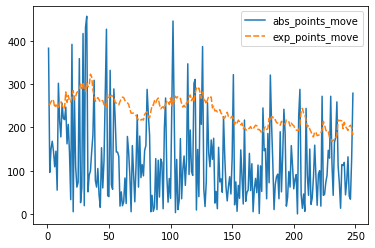

In [172]:
sns.lineplot(data=dff[["Date", "abs_points_move", "exp_points_move"]])

In [173]:
dff["overshoot"] = dff.apply(lambda x: (x["abs_points_move"] > x["exp_points_move"]), axis=1)
dff

,Date,Open,High,Low,Close,Adj Close,Volume,points_move,abs_points_move,returns,indiavix,vix_chg,vix_change,exp_move_pct,exp_points_move,lower,upper,overshoot
0,2022-04-01,17436.900391,17703.699219,17422.699219,17670.449219,17670.449219,291800,NaN,NaN,NaN,18.4350,-2.86%,NaN,NaN,NaN,NaN,NaN,False
1,2022-04-04,17809.099609,18114.650391,17791.400391,18053.400391,18053.400391,345500,383.0,383.0,0.021672,17.9075,3.24%,-0.028614,1.440234,254.0,17416.0,17924.0,True
2,2022-04-05,18080.599609,18095.449219,17921.550781,17957.400391,17957.400391,283500,-96.0,96.0,-0.005318,18.4875,2.89%,0.032389,1.399023,253.0,17800.0,18306.0,False
3,2022-04-06,17842.750000,17901.000000,17779.849609,17807.650391,17807.650391,328800,-150.0,150.0,-0.008339,19.0225,-0.13%,0.028938,1.444336,259.0,17698.0,18216.0,False
4,2022-04-07,17723.300781,17787.500000,17623.699219,17639.550781,17639.550781,308800,-168.0,168.0,-0.009440,18.9975,-6.90%,-0.001314,1.486133,265.0,17543.0,18073.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244,2023-03-24,17076.199219,17109.449219,16917.349609,16945.050781,16945.050781,228000,-132.0,132.0,-0.007721,15.2400,1.35%,0.051760,1.132031,193.0,16884.0,17270.0,False
245,2023-03-27,16984.300781,17091.000000,16918.550781,16985.699219,16985.699219,218400,41.0,41.0,0.002399,15.4450,-2.23%,0.013451,1.190625,202.0,16743.0,17147.0,False
246,2023-03-28,17031.750000,17061.750000,16913.750000,16951.699219,16951.699219,238800,-34.0,34.0,-0.002002,15.1000,-9.75%,-0.022337,1.206641,205.0,16781.0,17191.0,False
247,2023-03-29,16977.300781,17126.150391,16940.599609,17080.699219,17080.699219,345900,129.0,129.0,0.007610,13.6275,-5.08%,-0.097517,1.179688,200.0,16752.0,17152.0,False


In [174]:
dff["overshoot"].value_counts()

False    212
True      37
Name: overshoot, dtype: int64

In [175]:
overshoot_pct = dff["overshoot"].value_counts()[True] / dff.shape[0]
overshoot_pct.round(2)

0.15